In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import os

In [3]:
keras.__version__

'2.3.0-tf'

In [85]:
path = "C:/Users/suhas/Documents/Mini Project/Leaves/"
test = "C:/Users/suhas/Documents/Mini Project/Leaves/Test"

In [74]:
IMAGE_SIZE = 100
num_classes = 32
epochs = 1000
initializer = 'he_normal'

In [6]:
def label(img_name):
    num = img_name.split('_')[1]
    #print(num)
    if num == 'pubescent bamboo':
        return 0 
    elif num == 'chinese horse chestnut':
        return 1 
    elif num == 'anhui barberry':
        return 2 
    elif num == 'chinese redbud':
        return 3
    elif num == 'true indigo':
        return 4
    elif num == 'japanese maple':
        return 5 
    elif num == 'nanmu':
        return 6 
    elif num == 'castor aralia':
        return 7 
    elif num == 'chinese cinnamon':
        return 8 
    elif num == 'goldenrain tree':
        return 9 
    elif num == 'big fruited holly':
        return 10 
    elif num == 'japanese chestwood':
        return 11 
    elif num == 'wintersweet':
        return 12 
    elif num == 'camphor tree':
        return 13
    elif num == 'japan arrowwood':
        return 14
    elif num == 'sweet osmanthus':
        return 15
    elif num == 'deodar':
        return 16
    elif num == 'ginkgo':
        return 17 
    elif num == 'crape myrtle':
        return 18 
    elif num == 'oleandar':
        return 19
    elif num == 'yew plum pie':
        return 20
    elif num == 'japanese flowering cherry':
        return 21 
    elif num == 'glossy privet':
        return 22
    elif num == 'chinese toon':
        return 23
    elif num == 'peach':
        return 24
    elif num == 'ford woodlotus':
        return 25
    elif num == 'trident maple':
        return 26
    elif num == 'beales barberry':
        return 27
    elif num == 'southern magnolia':
        return 28
    elif num == 'canadian poplar':
        return 29
    elif num == 'chinese tulip tree':
        return 30
    elif num == 'tangerine':
        return 31

# Creating Dataset

In [86]:
def create_dataset(path):
    data = []
    for folder in os.scandir(path):
        if "leaf" in str(folder):
            for image in os.scandir(os.path.join(path, folder)):
                leaf = label(folder.name)
                if (leaf == None):
                    print(folder.name)
                    break
                img = cv2.imread(os.path.join(path, folder, image))

                # Basic processing
                imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 0)
                thresh, imgBW = cv2.threshold(imgBlur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                imgInv = cv2.bitwise_not(imgBW)
                kernel = np.ones((50, 50))
                imgClosed = cv2.morphologyEx(imgInv, cv2.MORPH_CLOSE, kernel)

                # Resize
                new = cv2.resize(imgClosed, (IMAGE_SIZE, IMAGE_SIZE))
                #Adding third dimension to shape
                new.shape += (1,)
                data.append([new, leaf])
    return data

In [87]:
data = create_dataset(path)

In [88]:
X = np.array([d[0] for d in data])
len(X)

1907

In [89]:
X = np.divide(X, 255)
len(X)
X.shape

(1907, 100, 100, 1)

In [90]:
y = np.array([d[1] for d in data])
len(y)

1907

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 1, stratify=y_train)

# CNN

In [75]:
model = Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    layers.Conv2D(64, 5, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    # Flattening output to connect to Densely Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer)
])

In [76]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [77]:
X_train.shape

(1072, 100, 100, 1)

In [78]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 50, 50, 16)        64        
_________________________________________________________________
dropout_22 (Dropout)         (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 25, 25, 32)       

(726, 100, 100, 1)

In [79]:
history = model.fit(x=X_train, y=y_train, epochs=epochs, validation_data = (X_val, y_val), use_multiprocessing = True, batch_size=32)

Epoch 1/1000
34/34 [==============================] - 7s 211ms/step - loss: 3.1965 - accuracy: 0.3554 - val_loss: 3.3949 - val_accuracy: 0.0838
Epoch 2/1000
34/34 [==============================] - 7s 216ms/step - loss: 2.9596 - accuracy: 0.5998 - val_loss: 3.4781 - val_accuracy: 0.0391
Epoch 3/1000
34/34 [==============================] - 7s 206ms/step - loss: 2.9089 - accuracy: 0.6409 - val_loss: 3.4787 - val_accuracy: 0.0391
Epoch 4/1000
34/34 [==============================] - 7s 200ms/step - loss: 2.8733 - accuracy: 0.6688 - val_loss: 3.4789 - val_accuracy: 0.0391
Epoch 5/1000
34/34 [==============================] - 7s 204ms/step - loss: 2.8405 - accuracy: 0.6987 - val_loss: 3.4788 - val_accuracy: 0.0391
Epoch 6/1000
34/34 [==============================] - 7s 199ms/step - loss: 2.8274 - accuracy: 0.7090 - val_loss: 3.4789 - val_accuracy: 0.0391
Epoch 7/1000
34/34 [==============================] - 7s 205ms/step - loss: 2.8034 - accuracy: 0.7351 - val_loss: 3.4788 - val_accuracy:

34/34 [==============================] - 8s 233ms/step - loss: 2.5877 - accuracy: 0.9356 - val_loss: 2.8182 - val_accuracy: 0.7151
Epoch 58/1000
34/34 [==============================] - 7s 216ms/step - loss: 2.5867 - accuracy: 0.9366 - val_loss: 2.8082 - val_accuracy: 0.7207
Epoch 59/1000
34/34 [==============================] - 8s 223ms/step - loss: 2.5872 - accuracy: 0.9356 - val_loss: 2.8252 - val_accuracy: 0.7095
Epoch 60/1000
34/34 [==============================] - 8s 226ms/step - loss: 2.5873 - accuracy: 0.9366 - val_loss: 2.8118 - val_accuracy: 0.7179
Epoch 61/1000
34/34 [==============================] - 7s 220ms/step - loss: 2.5901 - accuracy: 0.9328 - val_loss: 2.8149 - val_accuracy: 0.7207
Epoch 62/1000
34/34 [==============================] - 8s 222ms/step - loss: 2.5867 - accuracy: 0.9366 - val_loss: 2.8075 - val_accuracy: 0.7346
Epoch 63/1000
34/34 [==============================] - 8s 225ms/step - loss: 2.5844 - accuracy: 0.9375 - val_loss: 2.8111 - val_accuracy: 0.7179

34/34 [==============================] - 8s 240ms/step - loss: 2.5380 - accuracy: 0.9823 - val_loss: 2.7378 - val_accuracy: 0.7933
Epoch 114/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5383 - accuracy: 0.9813 - val_loss: 2.7410 - val_accuracy: 0.7989
Epoch 115/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5380 - accuracy: 0.9813 - val_loss: 2.7439 - val_accuracy: 0.7905
Epoch 116/1000
34/34 [==============================] - 8s 233ms/step - loss: 2.5368 - accuracy: 0.9841 - val_loss: 2.7514 - val_accuracy: 0.7737
Epoch 117/1000
34/34 [==============================] - 8s 241ms/step - loss: 2.5377 - accuracy: 0.9823 - val_loss: 2.7572 - val_accuracy: 0.7682
Epoch 118/1000
34/34 [==============================] - 8s 233ms/step - loss: 2.5375 - accuracy: 0.9832 - val_loss: 2.7479 - val_accuracy: 0.7821
Epoch 119/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5388 - accuracy: 0.9813 - val_loss: 2.7463 - val_accuracy: 

34/34 [==============================] - 8s 238ms/step - loss: 2.5363 - accuracy: 0.9832 - val_loss: 2.7407 - val_accuracy: 0.7933
Epoch 170/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5364 - accuracy: 0.9832 - val_loss: 2.7302 - val_accuracy: 0.7961
Epoch 171/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5364 - accuracy: 0.9823 - val_loss: 2.7332 - val_accuracy: 0.7933
Epoch 172/1000
34/34 [==============================] - 8s 240ms/step - loss: 2.5339 - accuracy: 0.9851 - val_loss: 2.7322 - val_accuracy: 0.7961
Epoch 173/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5367 - accuracy: 0.9823 - val_loss: 2.7260 - val_accuracy: 0.8017
Epoch 174/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5365 - accuracy: 0.9823 - val_loss: 2.7272 - val_accuracy: 0.7849
Epoch 175/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5352 - accuracy: 0.9832 - val_loss: 2.7284 - val_accuracy: 

34/34 [==============================] - 8s 234ms/step - loss: 2.5310 - accuracy: 0.9879 - val_loss: 2.7339 - val_accuracy: 0.7737
Epoch 226/1000
34/34 [==============================] - 8s 240ms/step - loss: 2.5315 - accuracy: 0.9879 - val_loss: 2.7321 - val_accuracy: 0.7821
Epoch 227/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5314 - accuracy: 0.9869 - val_loss: 2.7288 - val_accuracy: 0.8017
Epoch 228/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5305 - accuracy: 0.9879 - val_loss: 2.7214 - val_accuracy: 0.8073
Epoch 229/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5338 - accuracy: 0.9851 - val_loss: 2.7150 - val_accuracy: 0.8212
Epoch 230/1000
34/34 [==============================] - 8s 242ms/step - loss: 2.5327 - accuracy: 0.9869 - val_loss: 2.7253 - val_accuracy: 0.8073
Epoch 231/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5320 - accuracy: 0.9869 - val_loss: 2.7212 - val_accuracy: 

34/34 [==============================] - 8s 234ms/step - loss: 2.5293 - accuracy: 0.9888 - val_loss: 2.7180 - val_accuracy: 0.8017
Epoch 282/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5281 - accuracy: 0.9897 - val_loss: 2.7186 - val_accuracy: 0.7989
Epoch 283/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5276 - accuracy: 0.9907 - val_loss: 2.7177 - val_accuracy: 0.7989
Epoch 284/1000
34/34 [==============================] - 8s 240ms/step - loss: 2.5288 - accuracy: 0.9897 - val_loss: 2.7149 - val_accuracy: 0.8073
Epoch 285/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5282 - accuracy: 0.9907 - val_loss: 2.7195 - val_accuracy: 0.8045
Epoch 286/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5291 - accuracy: 0.9907 - val_loss: 2.7287 - val_accuracy: 0.7905
Epoch 287/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5293 - accuracy: 0.9897 - val_loss: 2.7223 - val_accuracy: 

34/34 [==============================] - 8s 233ms/step - loss: 2.5280 - accuracy: 0.9907 - val_loss: 2.7169 - val_accuracy: 0.8073
Epoch 338/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5280 - accuracy: 0.9897 - val_loss: 2.7190 - val_accuracy: 0.8017
Epoch 339/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5284 - accuracy: 0.9897 - val_loss: 2.7212 - val_accuracy: 0.8017
Epoch 340/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5289 - accuracy: 0.9888 - val_loss: 2.7277 - val_accuracy: 0.7933
Epoch 341/1000
34/34 [==============================] - 8s 233ms/step - loss: 2.5287 - accuracy: 0.9897 - val_loss: 2.7166 - val_accuracy: 0.8101
Epoch 342/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5286 - accuracy: 0.9897 - val_loss: 2.7151 - val_accuracy: 0.8128
Epoch 343/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5286 - accuracy: 0.9897 - val_loss: 2.7251 - val_accuracy: 

34/34 [==============================] - 8s 239ms/step - loss: 2.5276 - accuracy: 0.9907 - val_loss: 2.7037 - val_accuracy: 0.8184
Epoch 394/1000
34/34 [==============================] - 8s 233ms/step - loss: 2.5261 - accuracy: 0.9925 - val_loss: 2.7024 - val_accuracy: 0.8296
Epoch 395/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5275 - accuracy: 0.9916 - val_loss: 2.7093 - val_accuracy: 0.8128
Epoch 396/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5260 - accuracy: 0.9925 - val_loss: 2.7104 - val_accuracy: 0.8073
Epoch 397/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5267 - accuracy: 0.9916 - val_loss: 2.7239 - val_accuracy: 0.7989
Epoch 398/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5267 - accuracy: 0.9916 - val_loss: 2.7201 - val_accuracy: 0.8073
Epoch 399/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5259 - accuracy: 0.9925 - val_loss: 2.7214 - val_accuracy: 

34/34 [==============================] - 8s 240ms/step - loss: 2.5274 - accuracy: 0.9916 - val_loss: 2.7141 - val_accuracy: 0.7989
Epoch 450/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5268 - accuracy: 0.9916 - val_loss: 2.7133 - val_accuracy: 0.8101
Epoch 451/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5256 - accuracy: 0.9925 - val_loss: 2.7143 - val_accuracy: 0.8073
Epoch 452/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5262 - accuracy: 0.9916 - val_loss: 2.7101 - val_accuracy: 0.8128
Epoch 453/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5261 - accuracy: 0.9925 - val_loss: 2.7102 - val_accuracy: 0.8073
Epoch 454/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5280 - accuracy: 0.9907 - val_loss: 2.7114 - val_accuracy: 0.8073
Epoch 455/1000
34/34 [==============================] - 8s 240ms/step - loss: 2.5258 - accuracy: 0.9925 - val_loss: 2.7111 - val_accuracy: 

34/34 [==============================] - 8s 239ms/step - loss: 2.5260 - accuracy: 0.9925 - val_loss: 2.7228 - val_accuracy: 0.8017
Epoch 506/1000
34/34 [==============================] - 8s 237ms/step - loss: 2.5274 - accuracy: 0.9907 - val_loss: 2.7289 - val_accuracy: 0.7905
Epoch 507/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5273 - accuracy: 0.9907 - val_loss: 2.7286 - val_accuracy: 0.7905
Epoch 508/1000
34/34 [==============================] - 8s 237ms/step - loss: 2.5258 - accuracy: 0.9916 - val_loss: 2.7253 - val_accuracy: 0.7877
Epoch 509/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5253 - accuracy: 0.9935 - val_loss: 2.7228 - val_accuracy: 0.7849
Epoch 510/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5250 - accuracy: 0.9935 - val_loss: 2.7211 - val_accuracy: 0.7933
Epoch 511/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5252 - accuracy: 0.9935 - val_loss: 2.7259 - val_accuracy: 

34/34 [==============================] - 8s 236ms/step - loss: 2.5264 - accuracy: 0.9916 - val_loss: 2.7157 - val_accuracy: 0.8017
Epoch 562/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5256 - accuracy: 0.9925 - val_loss: 2.7157 - val_accuracy: 0.8017
Epoch 563/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5253 - accuracy: 0.9935 - val_loss: 2.7142 - val_accuracy: 0.7989
Epoch 564/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5248 - accuracy: 0.9935 - val_loss: 2.7147 - val_accuracy: 0.7989
Epoch 565/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5249 - accuracy: 0.9935 - val_loss: 2.7141 - val_accuracy: 0.8073
Epoch 566/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5247 - accuracy: 0.9935 - val_loss: 2.7131 - val_accuracy: 0.8045
Epoch 567/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5246 - accuracy: 0.9935 - val_loss: 2.7130 - val_accuracy: 

34/34 [==============================] - 8s 234ms/step - loss: 2.5246 - accuracy: 0.9935 - val_loss: 2.7045 - val_accuracy: 0.8156
Epoch 618/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5259 - accuracy: 0.9916 - val_loss: 2.7164 - val_accuracy: 0.7989
Epoch 619/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5247 - accuracy: 0.9935 - val_loss: 2.7183 - val_accuracy: 0.7961
Epoch 620/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5248 - accuracy: 0.9935 - val_loss: 2.7116 - val_accuracy: 0.8073
Epoch 621/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5239 - accuracy: 0.9944 - val_loss: 2.7100 - val_accuracy: 0.8073
Epoch 622/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5260 - accuracy: 0.9925 - val_loss: 2.7046 - val_accuracy: 0.8212
Epoch 623/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5255 - accuracy: 0.9935 - val_loss: 2.6987 - val_accuracy: 

34/34 [==============================] - 8s 236ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7195 - val_accuracy: 0.8073
Epoch 674/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7140 - val_accuracy: 0.8073
Epoch 675/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7130 - val_accuracy: 0.8073
Epoch 676/1000
34/34 [==============================] - 8s 240ms/step - loss: 2.5238 - accuracy: 0.9944 - val_loss: 2.7156 - val_accuracy: 0.8045
Epoch 677/1000
34/34 [==============================] - 8s 237ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7171 - val_accuracy: 0.8101
Epoch 678/1000
34/34 [==============================] - 8s 237ms/step - loss: 2.5247 - accuracy: 0.9935 - val_loss: 2.7121 - val_accuracy: 0.8156
Epoch 679/1000
34/34 [==============================] - 8s 237ms/step - loss: 2.5238 - accuracy: 0.9944 - val_loss: 2.7130 - val_accuracy: 

34/34 [==============================] - 8s 236ms/step - loss: 2.5255 - accuracy: 0.9925 - val_loss: 2.7079 - val_accuracy: 0.8240
Epoch 730/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7093 - val_accuracy: 0.8156
Epoch 731/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7109 - val_accuracy: 0.8184
Epoch 732/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7118 - val_accuracy: 0.8156
Epoch 733/1000
34/34 [==============================] - 8s 241ms/step - loss: 2.5244 - accuracy: 0.9935 - val_loss: 2.7138 - val_accuracy: 0.8184
Epoch 734/1000
34/34 [==============================] - 8s 241ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7125 - val_accuracy: 0.8156
Epoch 735/1000
34/34 [==============================] - 8s 240ms/step - loss: 2.5245 - accuracy: 0.9935 - val_loss: 2.7137 - val_accuracy: 

34/34 [==============================] - 8s 239ms/step - loss: 2.5240 - accuracy: 0.9944 - val_loss: 2.7179 - val_accuracy: 0.8017
Epoch 786/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5240 - accuracy: 0.9944 - val_loss: 2.7107 - val_accuracy: 0.8128
Epoch 787/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5238 - accuracy: 0.9944 - val_loss: 2.7053 - val_accuracy: 0.8268
Epoch 788/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7057 - val_accuracy: 0.8212
Epoch 789/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7081 - val_accuracy: 0.8156
Epoch 790/1000
34/34 [==============================] - 8s 233ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7080 - val_accuracy: 0.8156
Epoch 791/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5240 - accuracy: 0.9944 - val_loss: 2.7111 - val_accuracy: 

34/34 [==============================] - 8s 237ms/step - loss: 2.5238 - accuracy: 0.9944 - val_loss: 2.7104 - val_accuracy: 0.8073
Epoch 842/1000
34/34 [==============================] - 8s 249ms/step - loss: 2.5243 - accuracy: 0.9944 - val_loss: 2.7128 - val_accuracy: 0.8156
Epoch 843/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7135 - val_accuracy: 0.8101
Epoch 844/1000
34/34 [==============================] - 8s 238ms/step - loss: 2.5242 - accuracy: 0.9944 - val_loss: 2.7129 - val_accuracy: 0.8073
Epoch 845/1000
34/34 [==============================] - 8s 240ms/step - loss: 2.5256 - accuracy: 0.9925 - val_loss: 2.7136 - val_accuracy: 0.8045
Epoch 846/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5246 - accuracy: 0.9935 - val_loss: 2.7101 - val_accuracy: 0.8128
Epoch 847/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7112 - val_accuracy: 

34/34 [==============================] - 8s 234ms/step - loss: 2.5244 - accuracy: 0.9944 - val_loss: 2.7242 - val_accuracy: 0.7905
Epoch 898/1000
34/34 [==============================] - 8s 240ms/step - loss: 2.5242 - accuracy: 0.9935 - val_loss: 2.7283 - val_accuracy: 0.7933
Epoch 899/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7293 - val_accuracy: 0.7877
Epoch 900/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7282 - val_accuracy: 0.7877
Epoch 901/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.7274 - val_accuracy: 0.7933
Epoch 902/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5236 - accuracy: 0.9944 - val_loss: 2.7269 - val_accuracy: 0.7905
Epoch 903/1000
34/34 [==============================] - 8s 234ms/step - loss: 2.5238 - accuracy: 0.9944 - val_loss: 2.7252 - val_accuracy: 

34/34 [==============================] - 8s 235ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.6978 - val_accuracy: 0.8212
Epoch 954/1000
34/34 [==============================] - 8s 240ms/step - loss: 2.5237 - accuracy: 0.9944 - val_loss: 2.6962 - val_accuracy: 0.8268
Epoch 955/1000
34/34 [==============================] - 8s 235ms/step - loss: 2.5239 - accuracy: 0.9944 - val_loss: 2.6947 - val_accuracy: 0.8268
Epoch 956/1000
34/34 [==============================] - 8s 240ms/step - loss: 2.5244 - accuracy: 0.9935 - val_loss: 2.7010 - val_accuracy: 0.8240
Epoch 957/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5238 - accuracy: 0.9944 - val_loss: 2.7024 - val_accuracy: 0.8212
Epoch 958/1000
34/34 [==============================] - 8s 239ms/step - loss: 2.5240 - accuracy: 0.9944 - val_loss: 2.7039 - val_accuracy: 0.8156
Epoch 959/1000
34/34 [==============================] - 8s 236ms/step - loss: 2.5243 - accuracy: 0.9935 - val_loss: 2.7056 - val_accuracy: 

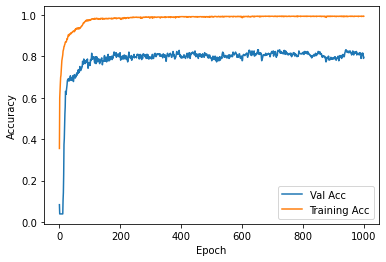

In [80]:
plt.figure()
plt.plot([i for i in range(epochs)], history.history['val_accuracy'], label='Val Acc')
plt.plot([i for i in range(epochs)], history.history['accuracy'], label='Training Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [66]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [82]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 1s 36ms/step - loss: 2.7415 - accuracy: 0.7736


[2.741489887237549, 0.7735849022865295]

In [83]:
model.save('C:/Users/suhas/Documents/College Projects/Leaf-Classification-Medicinal')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:/Users/suhas/Documents/College Projects/Leaf-Classification-Medicinal\assets


In [84]:
max(history.history['val_accuracy'])

0.832402229309082